In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

def show_torch_info():
    print(f"Torch v.{torch.__version__}")
    print(f"Cuda avialiable: {torch.cuda.is_available()}")

show_torch_info()

Torch v.1.12.1
Cuda avialiable: False


### Circular binary classifier
Note: https://lecture-demo.ira.uka.de/neural-network-demo/?preset=Binary%20Classifier%20for%20circular%20data

In [20]:
#data
class Circular(torch.utils.data.IterableDataset):
    def __init__(self):
        super().__init__()
        self.data = [
            (torch.tensor([1.46,1.36]), torch.tensor([0.])),
            (torch.tensor([1.14,1.26]), torch.tensor([0.])),
            (torch.tensor([0.96,0.97]), torch.tensor([0.])),
            (torch.tensor([1.04,0.76]), torch.tensor([0.])),
            (torch.tensor([1.43,0.81]), torch.tensor([0.])),
            (torch.tensor([1.3,1.05]), torch.tensor([0.])),
            (torch.tensor([1.45,1.22]), torch.tensor([0.])),
            (torch.tensor([2.04,1.1]), torch.tensor([0.])),
            (torch.tensor([1.06,0.28]), torch.tensor([0.])),
            (torch.tensor([0.96,0.57]), torch.tensor([0.])),
            (torch.tensor([1.28,0.46]), torch.tensor([0.])),
            (torch.tensor([1.51,0.33]), torch.tensor([0.])),
            (torch.tensor([1.65,0.68]), torch.tensor([0.])),
            (torch.tensor([1.67,1.01]), torch.tensor([0.])),
            (torch.tensor([1.97,0.55]), torch.tensor([0.])),

            (torch.tensor([1.5,1.83]), torch.tensor([1.])),
            (torch.tensor([0.76,1.69]), torch.tensor([1.])),
            (torch.tensor([0.4,0.71]), torch.tensor([1.])),
            (torch.tensor([0.61,1.18]), torch.tensor([1.])),
            (torch.tensor([0.26,1.42]), torch.tensor([1.])),
            (torch.tensor([0.28,1.89]), torch.tensor([1.])),
            (torch.tensor([1.37,1.89]), torch.tensor([1.])),
            (torch.tensor([1.11,1.9]), torch.tensor([1.])),
            (torch.tensor([1.05,2.04]), torch.tensor([1.])),
            (torch.tensor([2.43,1.42]), torch.tensor([1.])),
            (torch.tensor([2.39,1.2]), torch.tensor([1.])),
            (torch.tensor([2.1,1.53]), torch.tensor([1.])),
            (torch.tensor([1.89,1.72]), torch.tensor([1.])),
            (torch.tensor([2.69,0.72]), torch.tensor([1.])),
            (torch.tensor([2.96,0.44]), torch.tensor([1.])),
            (torch.tensor([2.5,0.79]), torch.tensor([1.])),
            (torch.tensor([2.85,1.23]), torch.tensor([1.])),
            (torch.tensor([2.82,1.37]), torch.tensor([1.])),
            (torch.tensor([1.93,1.9]), torch.tensor([1.])),
            (torch.tensor([2.18,1.77]), torch.tensor([1.])),
            (torch.tensor([2.29,0.39]), torch.tensor([1.])),
            (torch.tensor([2.57,0.22]), torch.tensor([1.])),
            (torch.tensor([2.7,-0.11]), torch.tensor([1.])),
            (torch.tensor([1.96,-0.2]), torch.tensor([1.])),
            (torch.tensor([1.89,-0.1]), torch.tensor([1.])),
            (torch.tensor([1.77,0.13]), torch.tensor([1.])),
            (torch.tensor([0.73,0.01]), torch.tensor([1.])),
            (torch.tensor([0.37,0.31]), torch.tensor([1.])),
            (torch.tensor([0.46,0.44]), torch.tensor([1.])),
            (torch.tensor([0.48,0.11]), torch.tensor([1.])),
            (torch.tensor([0.37,-0.1]), torch.tensor([1.])),
            (torch.tensor([1.03,-0.42]), torch.tensor([1.])),
            (torch.tensor([1.35,-0.25]), torch.tensor([1.])),
            (torch.tensor([1.17,0.01]), torch.tensor([1.])),
            (torch.tensor([0.12,0.94]), torch.tensor([1.])),
            (torch.tensor([2.05,0.32]), torch.tensor([1.])),
        ]

    def __iter__(self):
        return iter(self.data)
    
    def __len__(self):
        return len(self.data)

training_set = Circular()

In [3]:
class CircularBinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.l = nn.Linear(2,3)
        self.out = nn.Linear(3,1)
    
    def forward(self, t):
        t = torch.sigmoid(self.l(t))
        t = torch.sigmoid(self.out(t))
        return t

print(CircularBinaryClassifier())

CircularBinaryClassifier(
  (l): Linear(in_features=2, out_features=3, bias=True)
  (out): Linear(in_features=3, out_features=1, bias=True)
)


In [103]:
torch.manual_seed(250) #221 250
network = CircularBinaryClassifier()
training_loader = torch.utils.data.DataLoader(training_set, batch_size=51)
optimizer = optim.Adam(network.parameters(), lr=0.0002)
loss_f = nn.MSELoss()
NUM_EPOCHS = 120000

print(f"prepared a training set of {len(training_set)} samples")

prepared a training set of 51 samples


In [104]:
losses_history = []
for epoch in range(NUM_EPOCHS):
    total_loss = 0
    
    for batch in training_loader:
        inputs, expected = batch
        
        predictions = network(inputs)
        loss = loss_f(predictions, expected)
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    losses_history.append(total_loss)

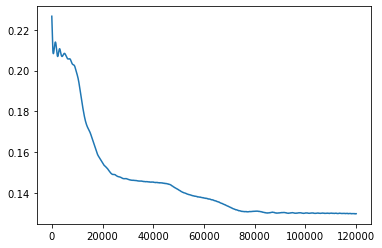

In [105]:
import matplotlib.pyplot as plt
plt.plot([l for l in losses_history])
plt.show()